#  <span style="color:blue">AWS</span>

#  <span style="color:blue">1.<u>Data Storage in AWS</u></span>

##  <span style="color:blue">1.1 <u> AWS S3</u></span>

- S3 allows you to store _objects_ in _buckets_ 

- Objects $\implies files$
    - Object Tags (key . value pair up to $10$):
    Useful for security / lifecycle / classifiyng data

    - Max size is $5TB$

    - Objects have a _Key_, which is the FULL path


- Buckets $\implies directories$
    - Buckets must have a _globally unique name_

    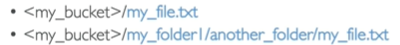

    <!> Not folder, but very long key name (partitioning)



- Durability: 99.9999
    + Your data is secure and you shouldn't lose an object in a long time

- Decoupling of storage 

-  S3 allows you to create a _Data Lake_ 
    + Inifinte Size, no provisioning 
    
- Centralized Architecture 
- Object storage
    + Supports any file format
    
- Data partitioning
    + Pattern for speedding up range queries 
    + It will be handled by some tools (AWS Glue)
    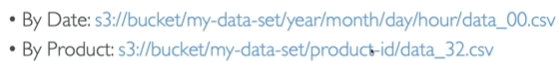


<span style="color:green"><u>Lab 1: Create bucket</u></span>

* Create a bucket:

`AWS services: S3 -> create bucket`

* You can create folders inside your bucket, to store your dataset:

`<your_bucket> -> create folder`

##  <span style="color:blue">1.1.1. <u>S3 Storage Triers</u></span>


It affects the pricing 

- Amazon S3 Standard - General Purpose
- Amazon S3 Standard-Infrequent Access (AI)
- Amazon S3 One Zone-Infrequent Access
    + One data center
    + There is a risk to loose your data
- Amazon S3 intelligent Tiering
    + Amazon will figure out where our data should be put to optimize the pricing
- Amazon Glacier:
    + For archives
    
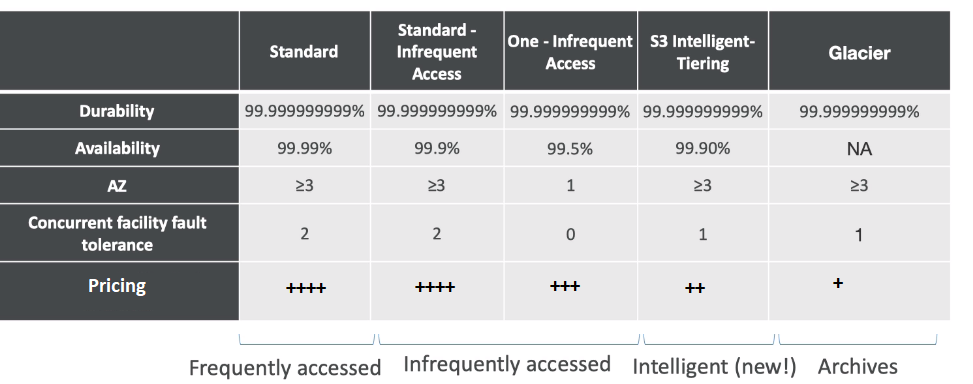

Tiers       | Designed for
------------|-------------
Standard	| Frequently accessed data (more than once a month) with milliseconds access
Intelligent-Tiering	| Data with changing or unknown access patterns	
Standard-IA	| Infrequently accessed data (once a month) with milliseconds access
One Zone-IA | Recreatable, infrequently accessed data (once a month) stored in a single Availability Zone with milliseconds access
Glacier Instant Retrieval |	Long-lived archive data accessed once a quarter with instant retrieval in milliseconds	
Glacier Flexible Retrieval (formerly Glacier) | Long-lived archive data accessed once a year with retrieval of minutes to hours
Glacier Deep Archive | Long-lived archive data accessed less than once a year with retrieval of hours
Reduced redundancy	| Noncritical, frequently accessed data with milliseconds access (not recommended as S3 Standard is more cost effective)

<span style="color:green"><u>Lab 1.2:</u></span>

`<your_bucket> -> <your_object> -> Properties -> Storage class `

##  <span style="color:blue">1.1.3. <u>S3 Lifecycle Rules</u></span>

Set of rules to move data between different tiers, to save storage cost.

- **Transition actions**: 

    Objects will be transitioned to another storage class.

Example: 

```
S3 Standard: when you use the data very often
Move the data after 60 days creation --> 
Standard IA: when you use the data very little
Move then data for archiving after 6 months  --> 
Glacier
```

- **Expiration actions**: 

    S3 deletes expired objects on our behalf

Example: 

```
Access log files can be set to delete after specified period of time.
```

`<your_bucket> -> <your_object> -> Management -> Lifecycle 
-> Add lifecycle rule # Add the name of the folder`

##  <span style="color:blue">1.2. <u>Redshift</u></span>


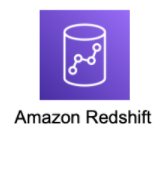

- Redshift is a data warehousing technology (big database) that you have to provide it, then you can do SQL based analytics.
- It's used as an OLAP (Online Analytical Processing)
- Use case: running some massively parallel SQL queries to perform some analytics
- Load data from S3 to Redshift or use Redshift Spectrum to query data directly in S3
- The data in Redshift is organized in columns

##  <span style="color:blue">1.3. <u>RDS & Aurora</u></span>


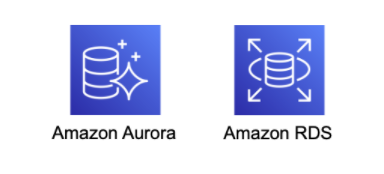


- Relation Store, SQL, OLTP (Online Transaction Processing)
- The data in RDS and AUrora is organized in rows
- Provision servers in advance 
- Use case: use RDS, if you want to store a little bit of data regarding your model for exports (at the raw level), but it will not be used directly for machine learning.

##  <span style="color:blue">1.4. <u>DynamoDB</u></span>

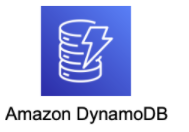

- NoSQL data store, serverless, provision red/write capacity
- Useful to store a Machinf Learning model served by your application

##  <span style="color:blue">1.4. <u>ElasticSearch</u></span>

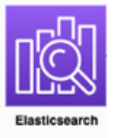

- Used for indexing and analytics and search
- It's a big database you have to provision in advance, it will index your data or search among data points
- Helpful if you want to do analytics such as click Stream Analytics, but no machine learning directly onto elastic search 


##  <span style="color:blue">1.4. <u>ElasticCache</u></span>

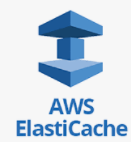

- Tt has a caching mechanism, which allows you to access your data easily and fastly
- It's not really used for machine learning but any time you see elasticate

#  <span style="color:blue">2. <u>Kenesis</u></span>

- Makes it easy to **collect**, **process** and **analyse** streaming data in **real-time**
- Ingests real-time data such as : Application logs, Metrics, Website clickstreams, IoT, telemetry data
- It's a managed alternative to _Apache Kafka_
- Data is automatically replicated synchronously to $3$ AZ

## Components of Kinesis

Kinesis Data Streams | Kinesis Data Firehose | Kinesis Data Analytics | Kinesis Video Streams 
----------|----------|----------|----------
Capture, process and store data streams. <br /> Low latency streaming ingest at scale | Load data streams into AWS data stores (S3, RedShift, ElasticSearch & Splunk)| Performs real-time ETL / ML algorithms on streams using SQL or Apache *Flink* | Capture, process and store video streams

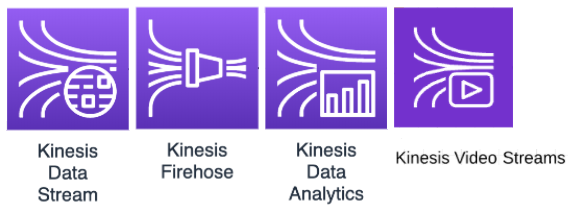

##  <span style="color:blue">2.1 <u>Kinesis Data Streams</u></span>

- For **real-time streaming** of fast & small records (1MB)
- Streams are divided in ordered sharps / partitions
- Sharps have to be provisioned in advance (capacity planning) 
- Data records can be up to $1MB$ in size
- You can have as many shards as you want
- More sharps $\implies$ more capacity and speed
- Billing is per shard provisioned
- Data retention, between $1$ day to $365$ days $\implies$ ability to reprocess or replay data in your consumers
- Multiple consuming applications can consume from the same stream
- Once data is inserted, it can't be deleted (immutability)
- Data that shares the same partition, goes to the same shard (ordering)

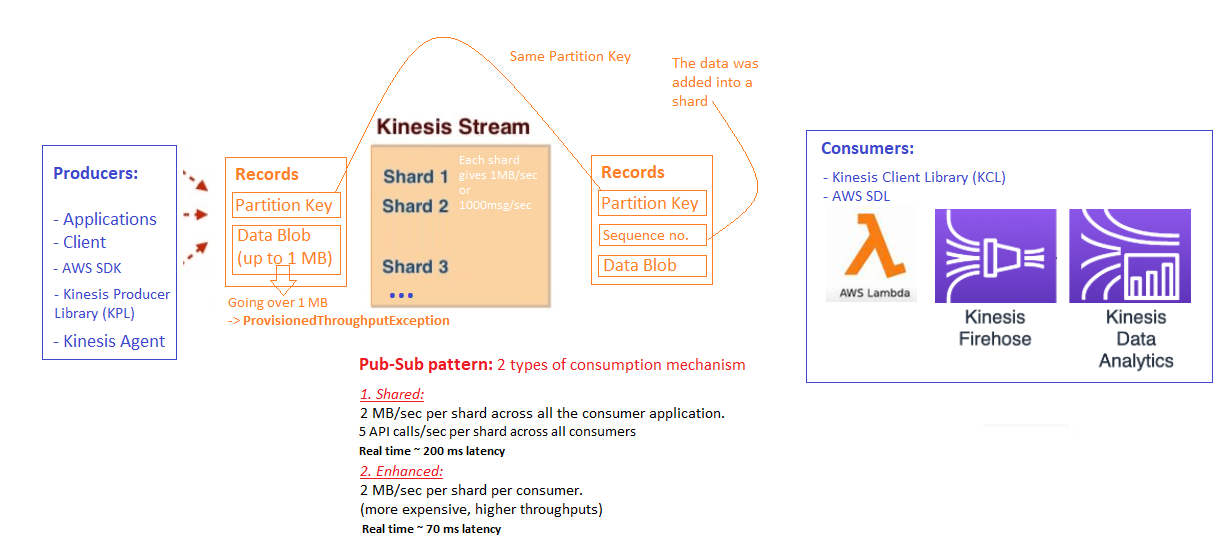

##  <span style="color:blue">2.1 <u>Kinesis Data Firehose</u></span>

- It stores data into target destinations (Redshift, AWS S3, ElasticSearch, Splunk)
- It's a fully managed service, no administration, automatic scaling, serverless
- It doesn't write stuff instantaneously, tt will try to batch them to write them efficiently (60 seconds latency minimum for non full batches or minimum 32 $MB$ of data at a time). Therefore, Kinesis Data Firehose is a **near real-time service**
- Pay for data going through Firehose (you're gonna need to provision Firehose in advance)
- It supports many data formats, conversion (S3: CSV $\to$ Json - Parquet $\to$ ORC), transformation (AWS Lambda: CSV $\to$ JSON) and compression (S3: GZIP, ZIP, SNAPPY)
- It supports custom data transformations using AWS Lambda 
- Pay for the amount of data going through Firehose 

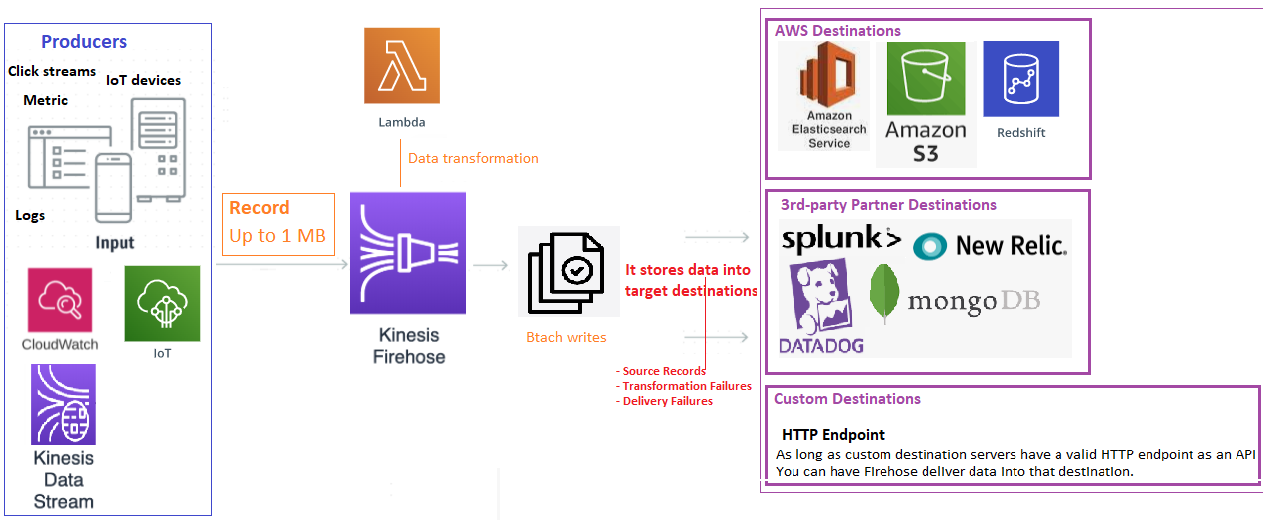

##  <span style="color:orange"><u>Kinesis Data Streams VS Data Firehose</u></span>



Data Streams  | Firehose
--------------|---------
Streaming service for ingest at scale | Load streaming data into S3, Redshift, ES / 3rd party partner (Splunk) / custom HTTP
Write custom code for the producer and the consumer| 
Supports replay capability | Doesn't support replay capability
Real time    | Near real time (buffer time 60 sec)
Must manage scaling (shard splitting / merging) | Fully managed service, no administration, Automatic scaling, Serverless data transformations with Lambda
Data storage for 1 tp 365 days, relay capability, multi consumers | No data storage








 

<span style="color:green"><u>Lab 2.1: Lab Kinesis Data Firehose</u></span> 

```
 Services -> Kinesis Data Firehose -> Create delivery stream
```
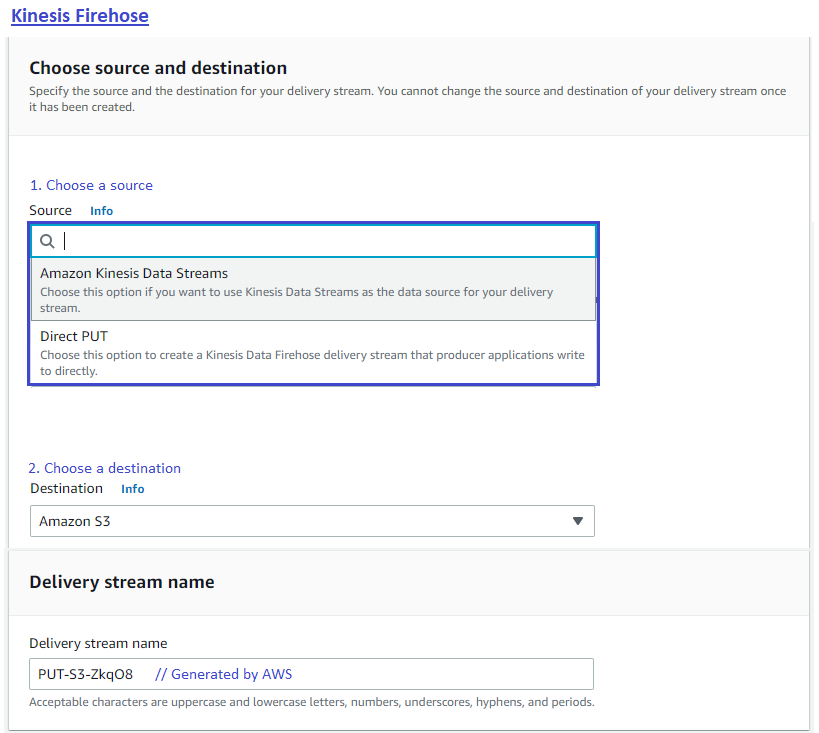


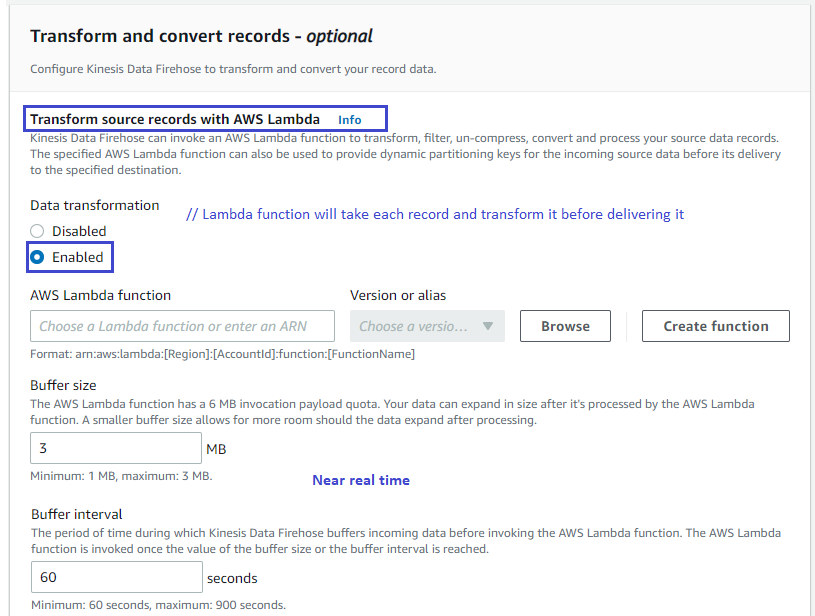


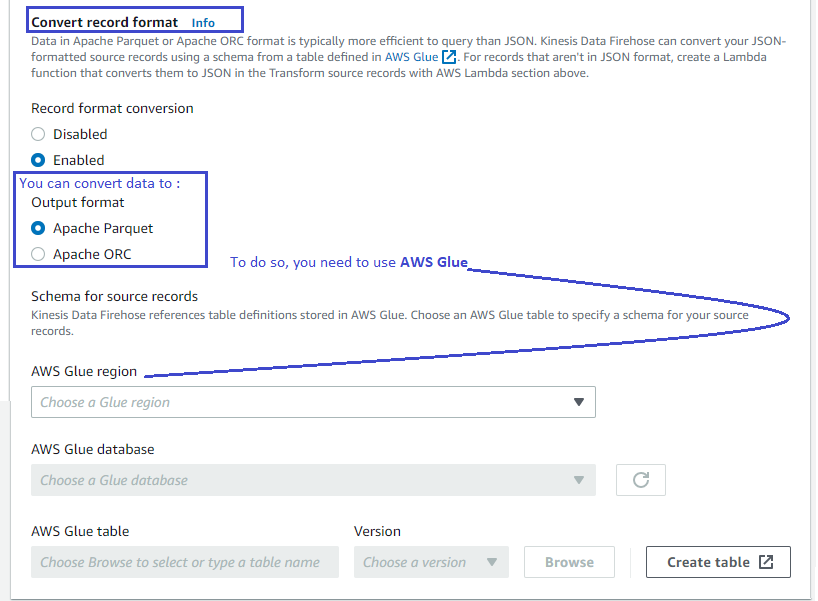

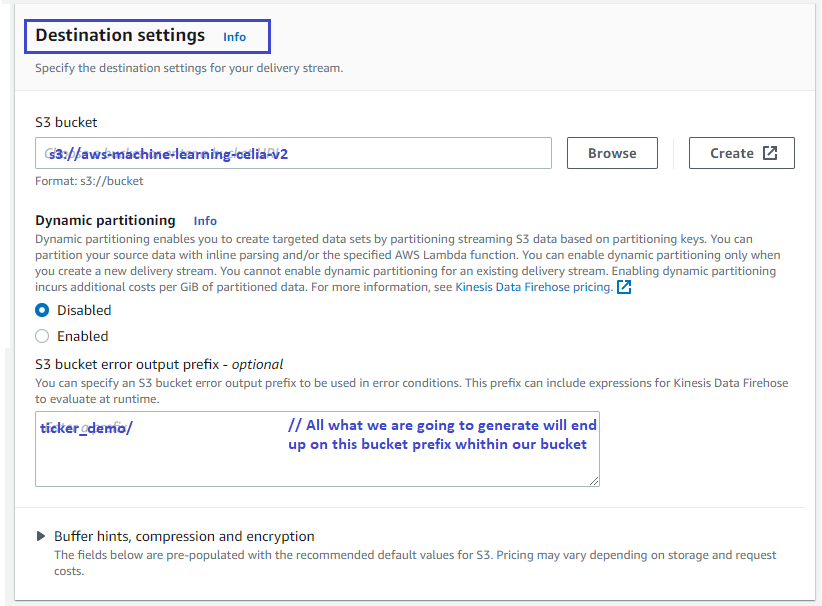


##  <span style="color:blue">2.3 <u>Kinesis Data Analytics</u></span>

- Performs real-time analytics on Kenis Streams using SQL or Flink 
- Use lambda for pr-processing 
- Fully managed, no servers to provision
- Automatic scaling 
- Serverless
- Real-time analytics
- Pay for actual data that flows through KDA
- Use IAM permissions to access streaming sources and destinations
- Can create streams out of the real-time queries, use cases:
    + Responsive analytics: look for certain criteria and build alerting (filtering)
    + Real-time dashboards
    + Real-time metrics: live leaderboard for a mobile game 
    + Streaming ETL: select columns, make simple transformations, on streaming data 
- In ML, you have 2 algorithms:
    + Random_cut_forest: 
        - SQL function used for anomaly detection on numeric columns in a stream 
        - Uses recent history data to compute model 
        
    + Hotspots:
        - Detect dense areas 
        - Allows you to locate and return information about relatively deep, dense regions in your data.
        
        
- No free tier for KDA

<span style="color:green"><u>Lab 2.3: Lab Kinesis Data Analytics</u></span> 

`Kinesis Firehose -> Sending demo data -> Analycis applications`


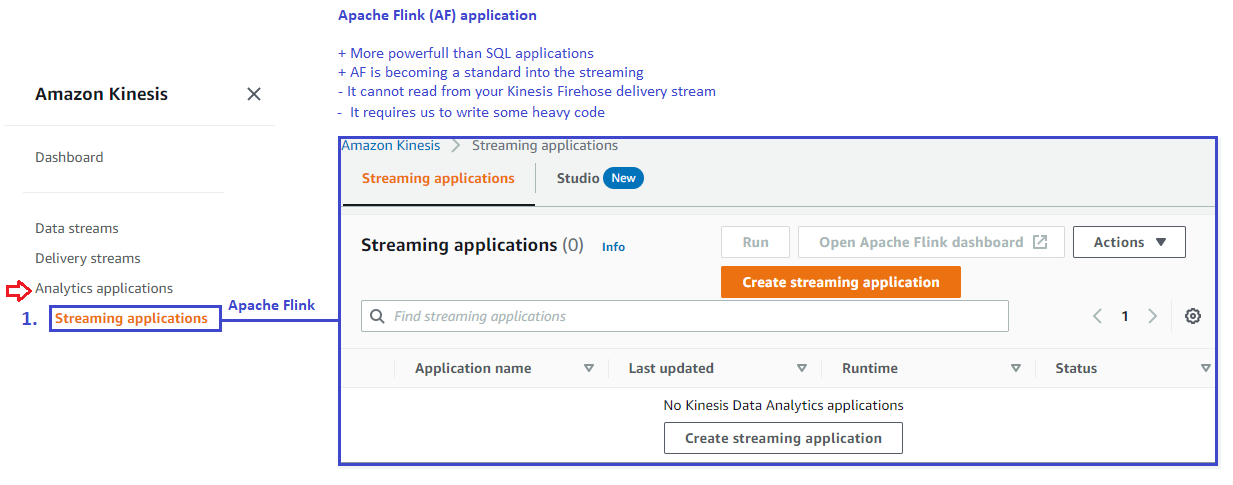

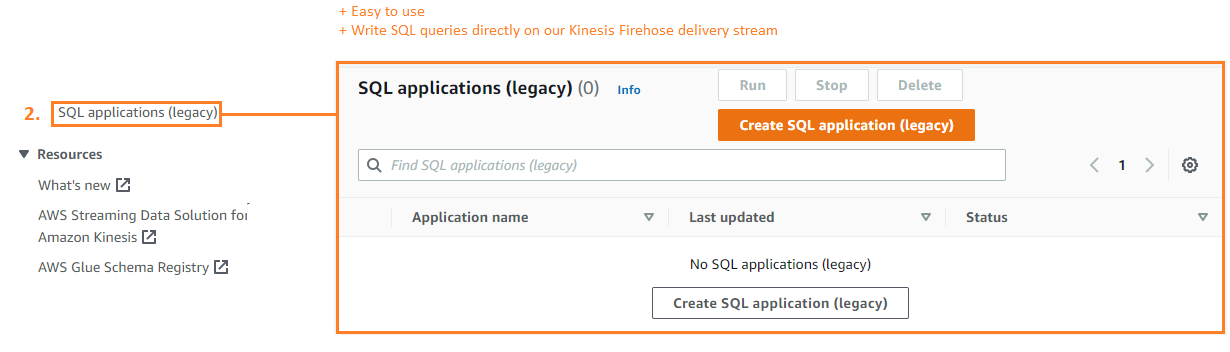

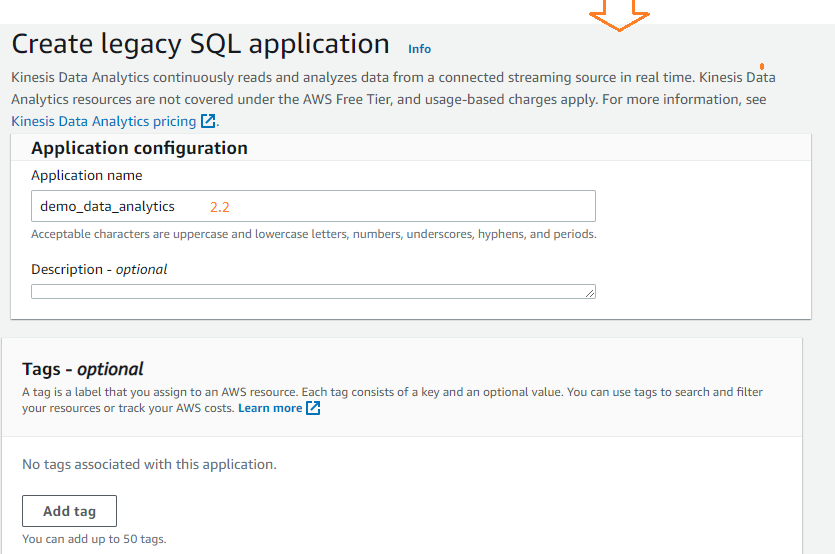

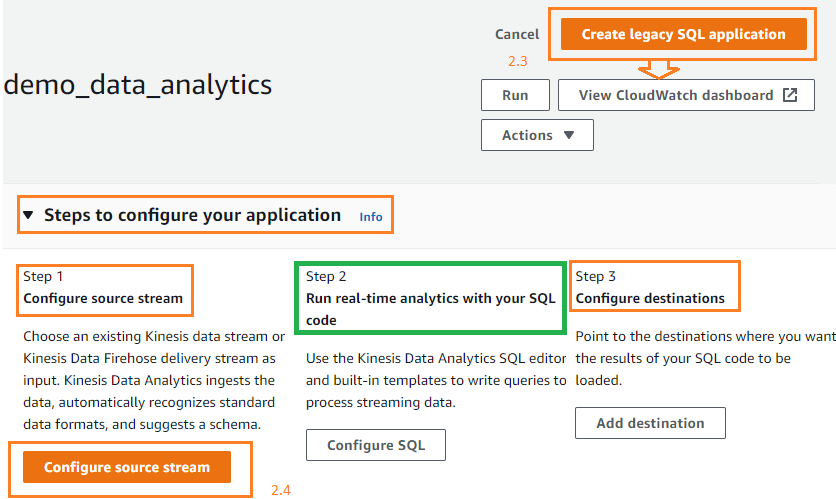

Step 1:

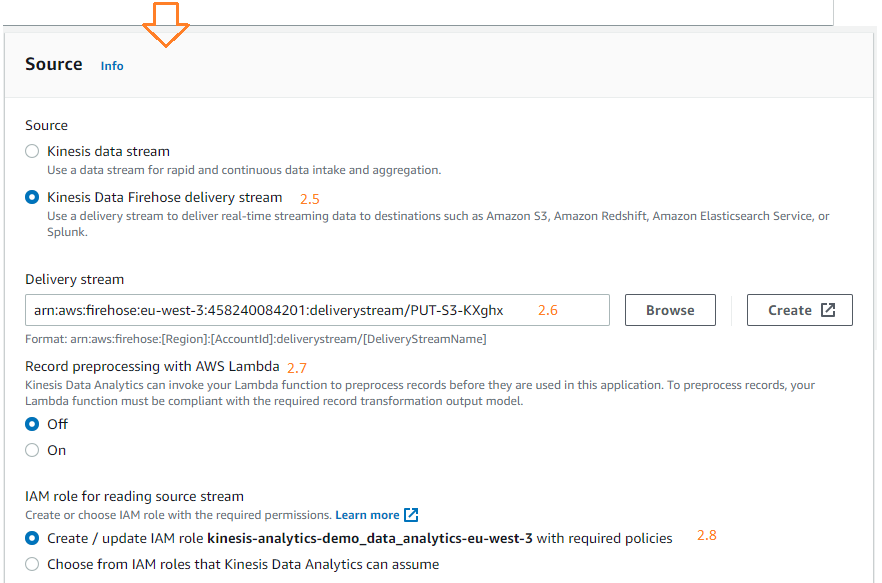

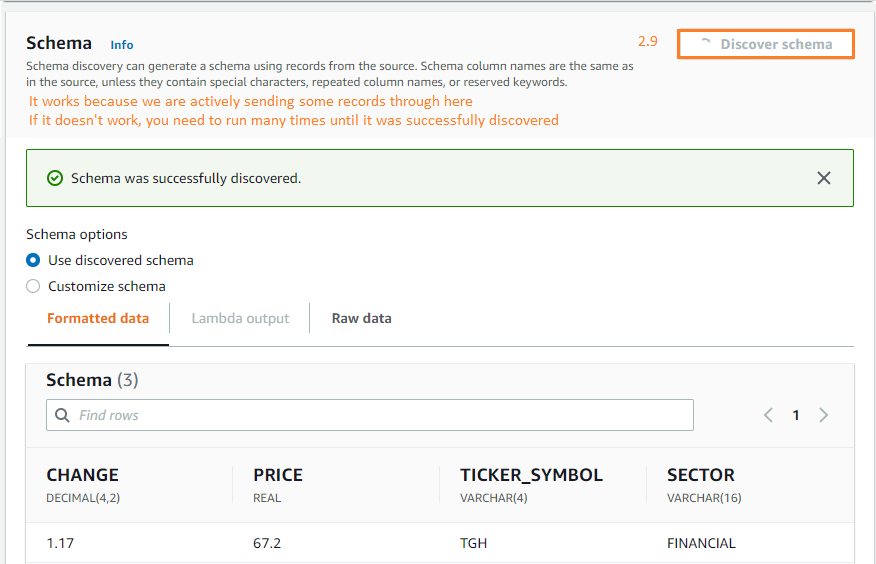

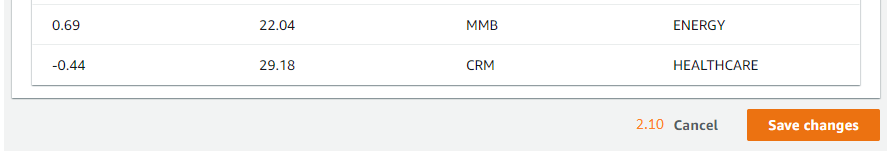

Step 2: 

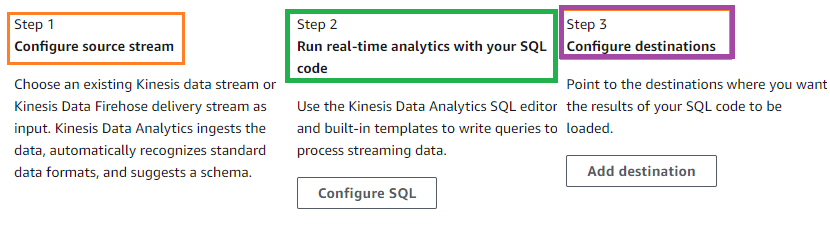

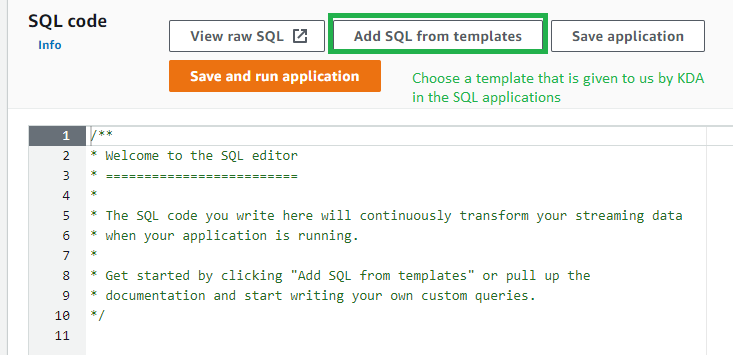

Step 3:

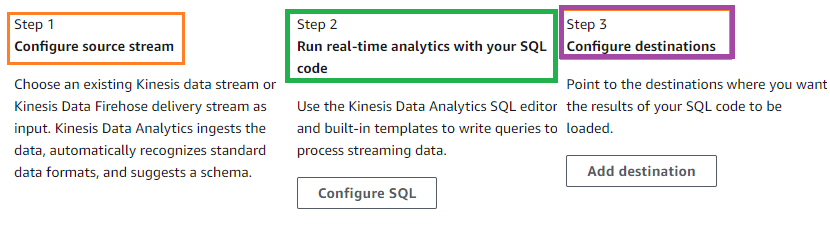

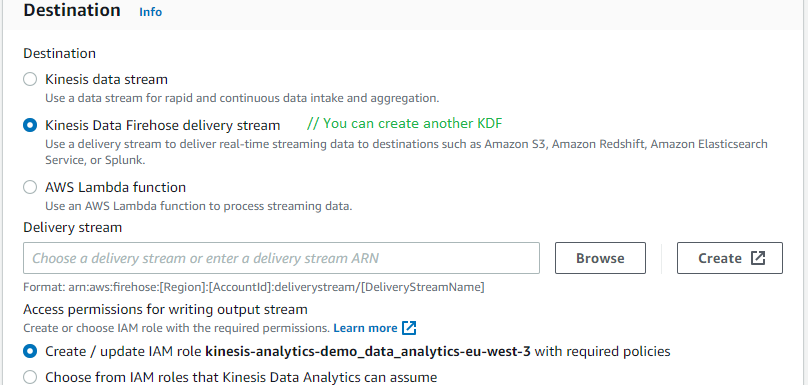

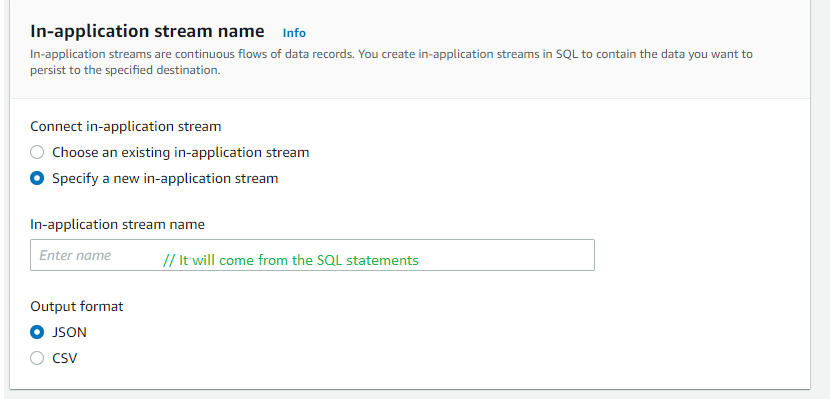

## <span style="color:blue">2.3 <u>Kinesis Video Stream</u></span>


- the convention is to have one producer per video stream
- video playback capacility 
- You can keep the data for 1 hour to 10 years

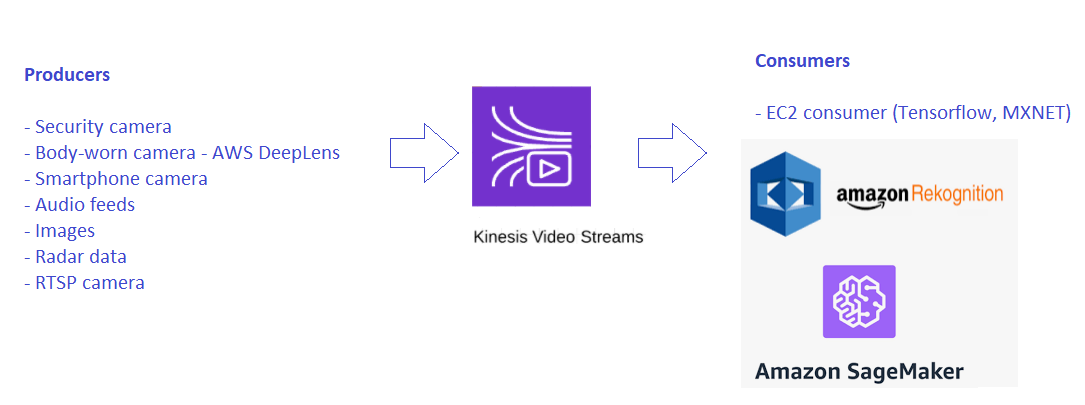

Architecture:

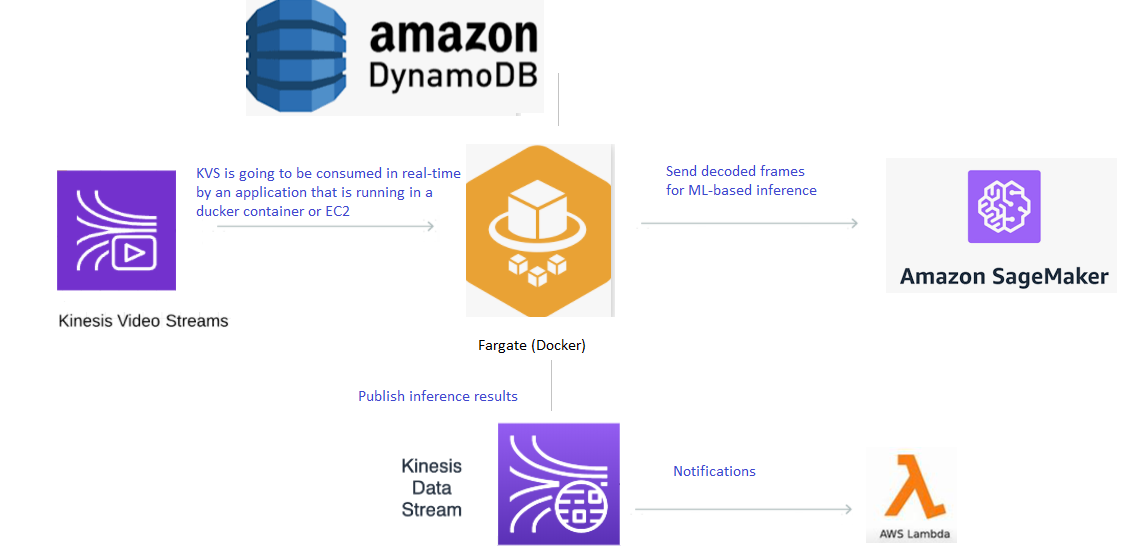

## 3. Glue Data Catalog

- Metadata repository for all your tables (1 table per folder in S3)
- Glue Crawlers can help build the Glue Data Catalog (by going through all you data to infer schamas and partitions)
- Glue Crawler works with JSON, Parquet, CVS, relational store
- Glue Crawler works with S3, Amazon RedShift, Amazon RDS
- Run the Crawler on a Schedule or On Demand
- Glue Crawler will extract partitions based on how your S3 data is organized 
- Automated Schama inference
- Schemas are versioned
- This metadata repository has integration with Athena or Redshift spectrum to do schema and data discovery
- Need an IAM role / credentials to access the data stores 
- Glue has the concept of partitions 


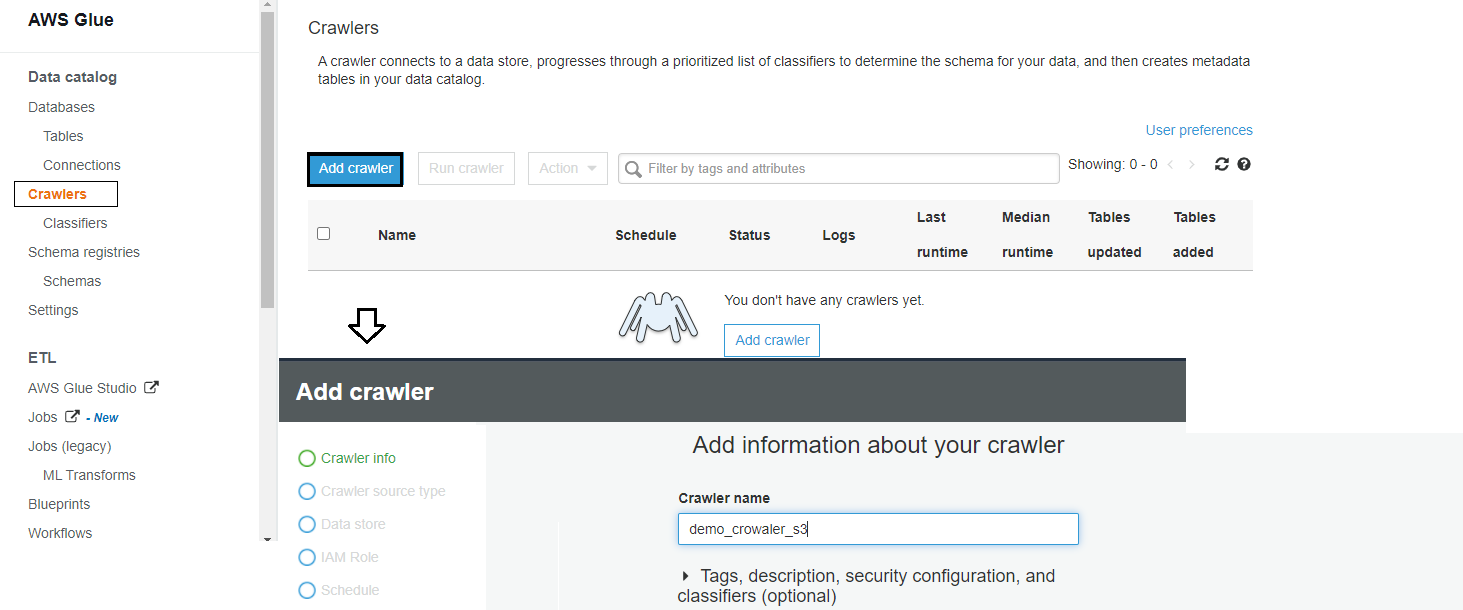

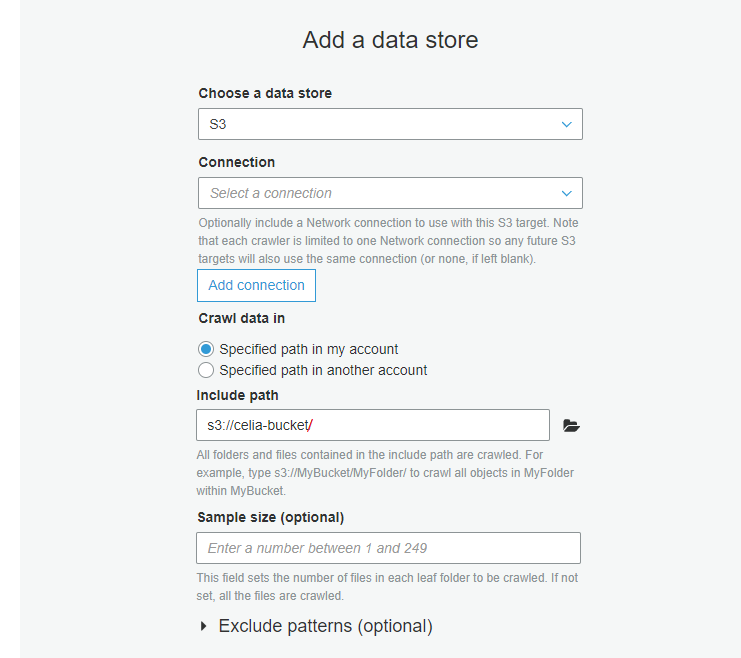

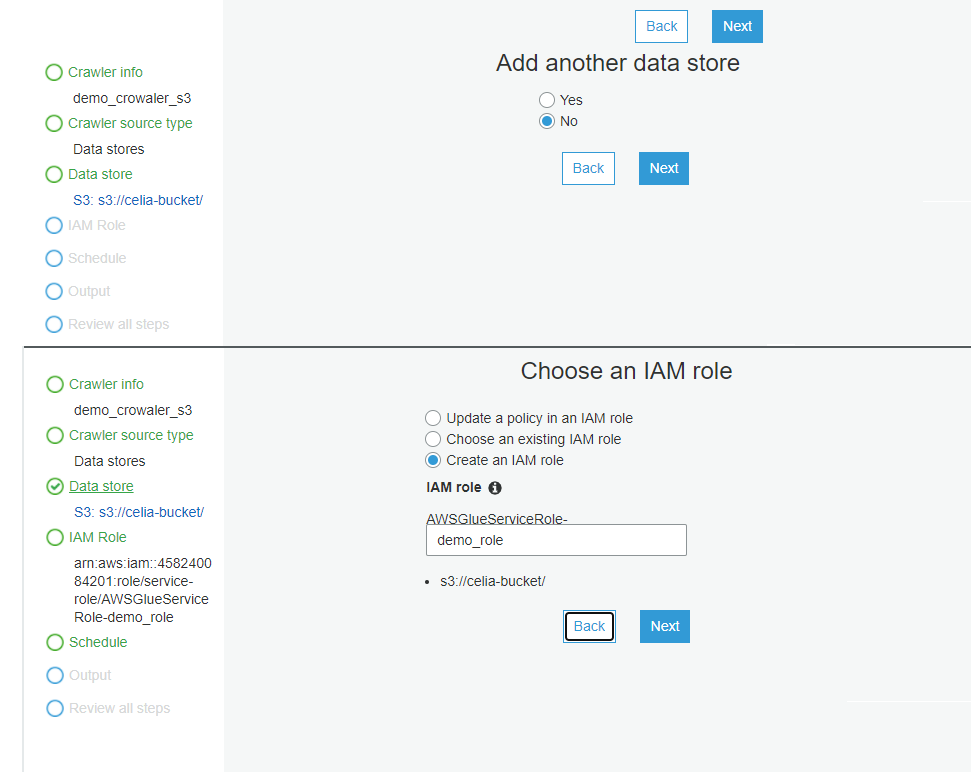

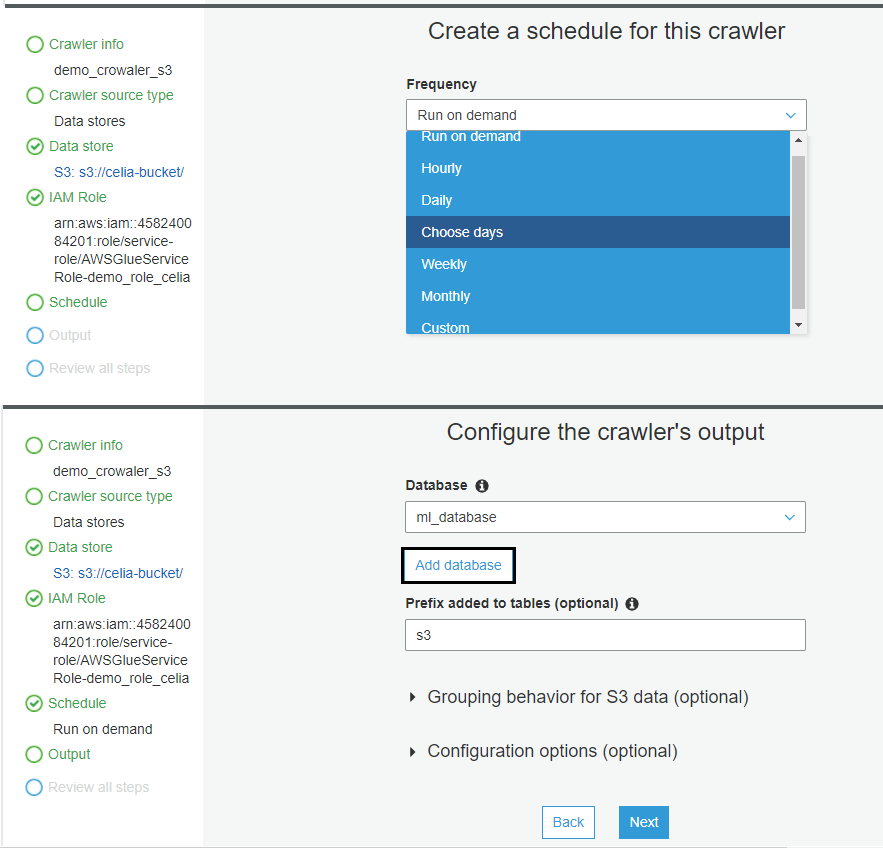


##  <span style="color:blue">3.2. <u>Glue ETL </u></span>

- ETL stands for **extract, transform and load** which allows you to transform, clean data, and enrich data before you would do an analysis or training a ML model on it

- Generates code in Python or in Scala, and you can modify the code directly, or you can provide your own spark or PySpark scripts

- The targets can be S3, it can be JDBC for (RDS and Redshift) or Glue data catalog

- Fully managed, cost effective, pay only for the resource consumed

- Job are run on a serverless Spark platform (don't need to worry about provisioning a spark cluster or how to run your jobs)

- Glue schedular to schedule the jobs

- Glue triggers to automate jobs runs based on events

##  <span style="color:blue">3.3. <u>Glue ETL - Transformations </u></span>

1. Bundled Transformaions 
    - FropFields, DropNullFields:  remove fields / remove null fields
    - Filter: specify a function to filter records 
    - Join: to enrich data 

1. ML Transformaions 
    - FindMatches ML: identify duplicate or matching records in your dataset (even when the records do not have a common unique identifier and no fields match exactly)

1. Format conversions: CSV, JSON, Avro, Parquet, ORC, XML

1. Apache Spark transformations (ex. K-Means)

Lab:

`AWS Glue -> Jobs (legacy) -> New Job`

#  <span style="color:blue">4. <u>Athena</u></span>

- Serverless service
- No need to load data in Athena, it stays in S3 in its raw form
- Athena supports: CSV, JSON, ORC, Parquet, Avro (unstructred, semi-structured or structured data)
- There is a relationship beween **Athena** and **Glue**.
- Athena will detect the tables / databases / Json files / Parquet data 
- Athena allows us to run SQL queries directly whithout provisionning any servers
- For the data that sits in S3, you need to have the **Glue catalog** to make them appear in Athena 
- For data that sits in S3, you need the **Glue catalog** to make it visible in Athena

## Athena coast model

- Pay-as-you-go 
- 5$ per TB scanned (it charges you for the amount of data scan per query)
- You can cost down by compressing you data 
- No charge for Drop/Alter/Create
- Save lots of money 30-90% by using columnar formats (ORC, Parqeut). Because Athena reads only the columns that it needs to process the data fot that query
- Glue and S3 have their own charges

#  <span style="color:blue">5. <u>AWS Step Functions</u></span>

- Used to design workflows
- Easy visualizations
- It provides us with advanced error handling and retries mechanism outside the code 
- All the orchastration is managed by *Step functions*, we get autid of the history of workflows
- The ability to wait for an arbitrary amount of time
- You can have a maximum execution time of one year. So, it could be a very long workflow.

#  <span style="color:blue">6. <u>AWS Data Pipeline </u></span>

- A service to move data from one place to another, it's an ETL service 
- The ETL runs within EC2 instance that it's managed by Data Pipeline
- The destinations that are popular with data pipeline include: S3, RDS, DynamoDB, Redshift, and EMR
- Useful to manage task dependencies. So it's just an orchestrator, it has some capability to do retries and notifications on failure
- It's also highly available 
- Data sources may be on-premises

![Data_Pipeline](./Images/Data_Pipeline_1.png)


#  <span style="color:blue">7. <u>AWS Batch</u></span>

- Allows you to run bacth jobs as Docker images 
- AWS batch, you don't provision the instance, there is dynamic provisioning of the instances (EC2, Spot Instances)
- AWS batch figures out the optimal quantity and the type of these instances, based on the volume of jobs it has to do, and the requirements.
- No need to manage clusters, fully serverless
- You just pay for the underlying EC2 instances are created by a batch itself
- Schedule Batch Jobs using CloudWatch Events
- Orchastrate Batch Jobs using AWS Step Function

#  <span style="color:blue">8. <u>AWS Database Migration</u></span>

- It's a quick way to securely migrate databases to AWS, it's resilient and self healing
- The source database remains available during the migration and it's continuous
- It supports : 
        - Homogenous migrations: ex Orale to Orale
        - Heterogeneous migrations: ex Microsoft SQL Server to Aurora
- It's continuous Data Replication using CDC
- You must create an EC2 instance to perform the replication tasks


Source DB ---> EC2 (Running DMS service) ---> Target DB

####  <span style="color:orange">Difference between Glue, Data Pipeline, Batch Jobs vs Glue</span>


##### <span style="color:orange">Glue</span> :

- Glue ETL - where you run Apache Spark code that is Scala or Python-based
- Glue ETL - do not worry about configuring or managing the ressources  
- Data Catalog - helps you make the data available to other services, such as: Athena, RedShift Spectrum
- All the resources belong to AWS, so it's not necessarily easy to get access
- The minimum amount if time, you can set up a Glue ETL is 5 minutes


##### <span style="color:orange">Data Pipeline</span> :
- It's an orchestration service, it doesn't run the stuff for you
- More control over the environment, compute resources that run the code
- Allows acces to EC2 or EMR instances and the ressources that are created within your own account


##### <span style="color:orange">Batch</span> :
- Non ETL related work, but it's batch-oriented
- It's for any computing job regardless of the job (not only for ETL). As long as, you a have Docker Image that works for BJ. 
- Batch Jos has access to all the ressources that are created in your account 

##### <span style="color:orange">DMS</span> :
- Continuous Data Replication (Real time, no minimum amount if time like Glue)
- No data transformation, so if you have ETL requirements then you need to do it afterwards
- Use case: Use DMS to take a database on-premise and replicate it into the cloud, then, use glue ETL to take the data from this database and perform an ETL on it before putting it somewhere else, for example in S3.



##### <span style="color:red">Conclusion</span> :

They are both ETL services, but Glue is more Apache Sparrk focused, just ETL focused, taking data, making some transformations and placing it somewhere, whereas Data Pipeline gives you a bit more control, is an orchestration service and runs on EC2 or EMR instances. Non ETL related work, but it's batch-oriented.

Glue and DMS are 2  complementary services but remember DMS is for database migrations and glue is for pure ETL.

## <span style="color:red">Data Engineering Summary</span> :


Amazon S3: Object Storage for your data

VPC Endpoint Gateway: Privately access your S3 bucket without going through the public internet

Kinesis Data Streams: real-time data streams, need capacity planning, real-time applications

Kinesis Data Firehose: near real-time data ingestion to S3, Redshift, ElasticSearch, Splunk

Kinesis Data Analytics: SQL transformations on streaming data

Kinesis Video Streams: real-time video feeds

Glue Data Catalog & Crawlers: Metadata repositories for schemas and datasets in your account

Glue ETL: ETL Jobs as Spark programs, run on a serverless Spark Cluster

DynamoDB: NoSQL store

Redshift: Data Warehousing for OLAP, SQL language

Redshift Spectrum: Redshift on data in S3 (without the need to load it first in Redshift)

RDS / Aurora: Relational Data Store for OLTP, SQL language

ElasticSearch: index for your data, search capability, clickstream analytics

ElastiCache: data cache technology

Data Pipelines: Orchestration of ETL jobs between RDS, DynamoDB, S3. Runs on EC2 instances

Batch: batch jobs run as Docker containers - not just for data, manages EC2 instances for you

DMS: Database Migration Service, 1-to-1 CDC replication, no ETL

Step Functions: Orchestration of workflows, audit, retry mechanisms

Briefly mentioned, covered by Frank Kane:

EMR: Managed Hadoop Clusters

Quicksight: Visualization Tool

Rekognition: ML Service

SageMaker: ML Service

DeepLens: camera by Amazon

Athena: Serverless Query of your data